# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [52]:
# Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame
df = pd.read_csv('bank_transactions.csv')

# Menggunakan 0.5% dari dataset
df_sampled = df.sample(frac=0.015, random_state=32)

In [53]:
# Menampilkan banyaknya data sample yang digunakan
print(f'Banyaknya data keselutuhan: {len(df)} data')
print(f'Banyaknya data sample yang digunakan: {len(df_sampled)} data')

Banyaknya data keselutuhan: 1048567 data
Banyaknya data sample yang digunakan: 15729 data


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [54]:
df_sampled.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
129423,T129424,C5535825,3/12/90,F,NAVI MUMBAI,1575.66,6/8/16,225146,606.9
325259,T325260,C1711120,7/7/89,M,AMRITSAR,118.85,15/8/16,91744,100.0
199547,T199548,C8041662,4/6/86,M,LUCKNOW,25990.66,8/8/16,120623,200.0
501464,T501465,C3844524,28/11/91,F,DELHI EAST,19420.88,20/8/16,201800,119.0
906893,T906894,C7229079,9/11/85,M,GUWAHATI,23514.02,12/9/16,140009,101.0


In [55]:
# Memahami Struktur Data
print(df_sampled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 15729 entries, 129423 to 586508
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            15729 non-null  object 
 1   CustomerID               15729 non-null  object 
 2   CustomerDOB              15681 non-null  object 
 3   CustGender               15703 non-null  object 
 4   CustLocation             15727 non-null  object 
 5   CustAccountBalance       15694 non-null  float64
 6   TransactionDate          15729 non-null  object 
 7   TransactionTime          15729 non-null  int64  
 8   TransactionAmount (INR)  15729 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB
None


In [56]:
print(df_sampled.describe())

       CustAccountBalance  TransactionTime  TransactionAmount (INR)
count        1.569400e+04     15729.000000             15729.000000
mean         1.198998e+05    157434.379236              1684.339905
std          9.172360e+05     50775.537551              7266.167142
min          0.000000e+00         2.000000                 0.000000
25%          4.712580e+03    124038.000000               170.000000
50%          1.685515e+04    164332.000000               460.000000
75%          5.887475e+04    200018.000000              1218.000000
max          8.224463e+07    235926.000000            557000.730000


In [57]:
# Menangani Data yang Hilang
df.isnull().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

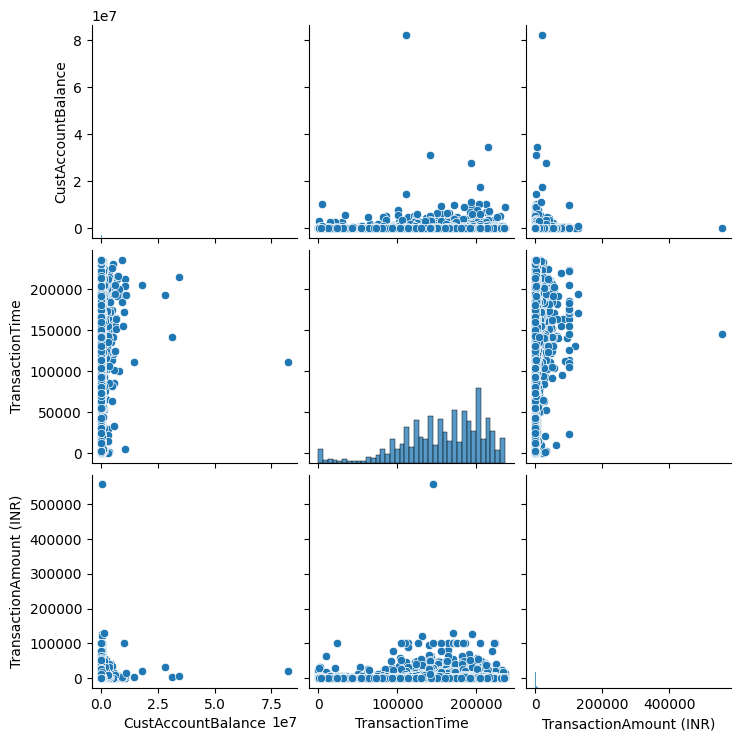

In [58]:
# Analisis Distribusi dan Korelasi
sns.pairplot(df_sampled)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [59]:
print(df_sampled.columns)

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


In [62]:
# Pilih fitur yang digunakan
selected_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime', 'CustGender', 'CustLocation']
available_features = [col for col in selected_features if col in df_sampled.columns]
df_selected = df_sampled[available_features].copy()

# Pisahkan fitur numerikal dan kategorikal
numerical_features = ['CustAccountBalance', 'TransactionAmount (INR)', 'TransactionTime']
categorical_features = ['CustGender', 'CustLocation']

# Menangani data yang hilang pada fitur numerikal
imputer_num = SimpleImputer(strategy='mean')
df_selected[numerical_features] = imputer_num.fit_transform(df_selected[numerical_features])

# Menangani data yang hilang pada fitur kategorikal
imputer_cat = SimpleImputer(strategy='most_frequent')
df_selected[categorical_features] = imputer_cat.fit_transform(df_selected[categorical_features])

# Encoding fitur kategorikal
label_encoder = LabelEncoder()
for column in categorical_features:
    df_selected[column] = label_encoder.fit_transform(df_selected[column])

# Standarisasi fitur numerikal
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [63]:
range_n_clusters = list(range(2, 11))
silhouette_avg = []
inertia = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=22)
    cluster_labels = kmeans.fit_predict(df_selected)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(df_selected, cluster_labels))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

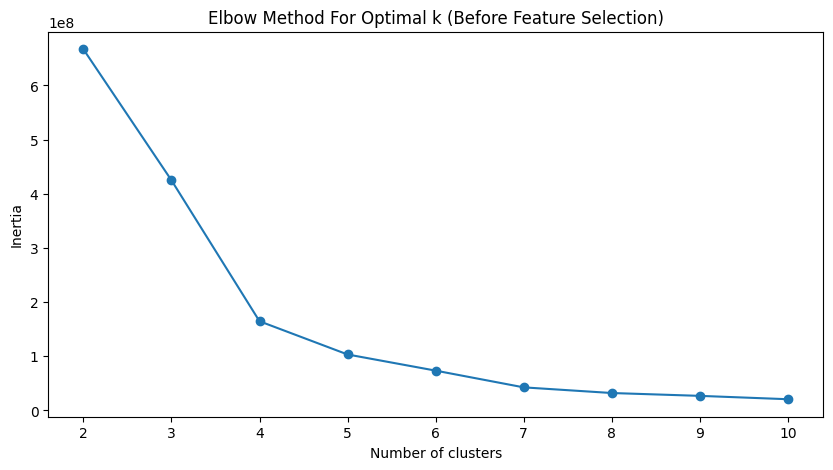

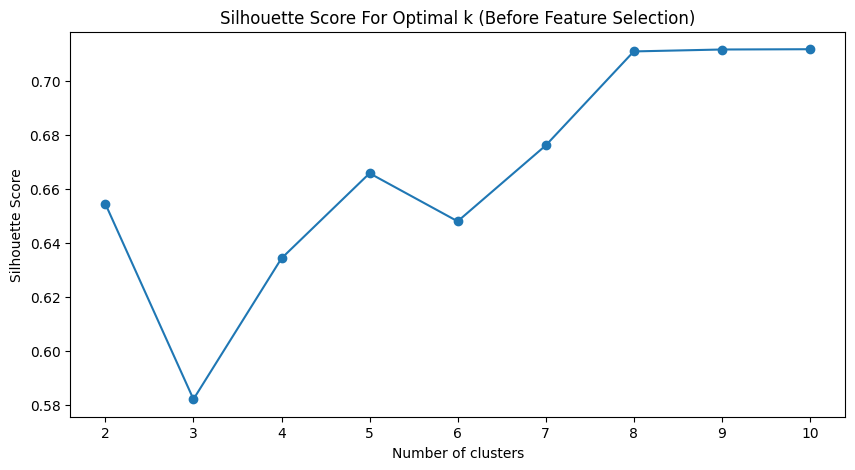

Jumlah cluster optimal sebelum feature selection: 10
Silhouette Score sebelum feature selection: 0.7116


In [64]:
# Plot Elbow Method sebelum feature selection
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k (Before Feature Selection)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score sebelum feature selection
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg, marker='o')
plt.title('Silhouette Score For Optimal k (Before Feature Selection)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_clusters_before = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print(f'Jumlah cluster optimal sebelum feature selection: {optimal_clusters_before}')
print(f'Silhouette Score sebelum feature selection: {max(silhouette_avg):.4f}')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [65]:
# Feature Selection
X = df_selected.drop(columns=['CustGender'])
y = df_selected['CustGender']
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
df_selected = df_selected[selected_columns]

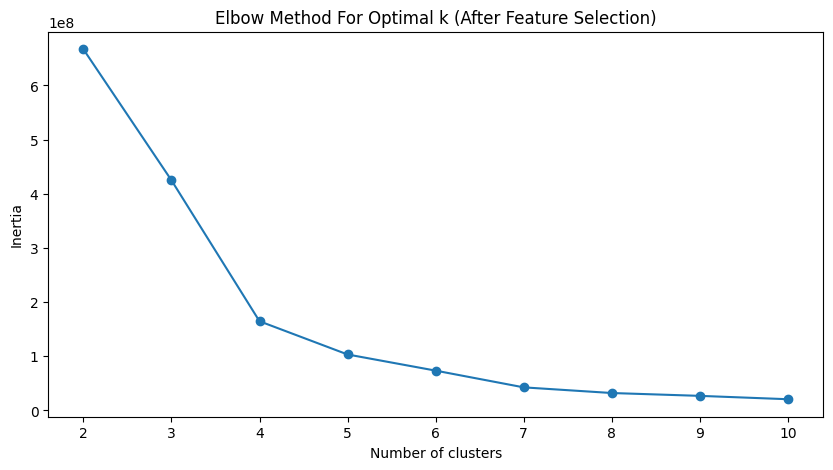

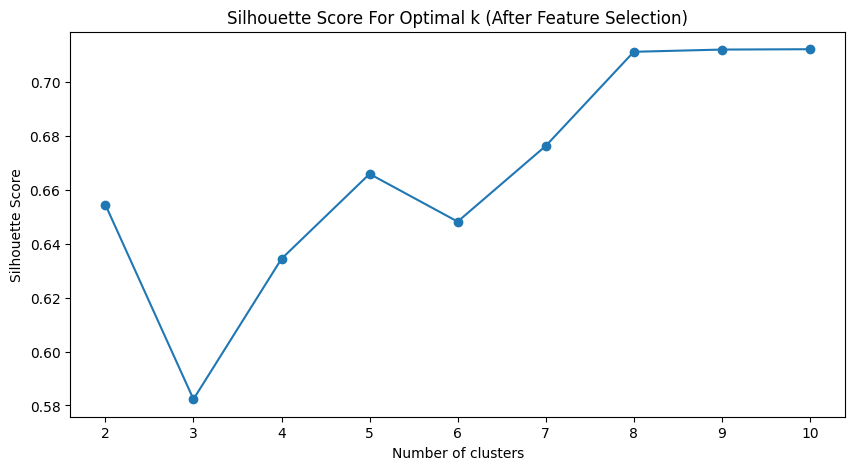

Jumlah cluster optimal sebelum feature selection: 10
Silhouette Score sebelum feature selection: 0.7122


In [66]:
# Langkah 3: Pemodelan dan evaluasi clustering setelah feature selection
inertia_new = []
silhouette_avg_new = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=22)
    cluster_labels_new = kmeans.fit_predict(X)
    inertia_new.append(kmeans.inertia_)
    silhouette_avg_new.append(silhouette_score(X, cluster_labels_new))

# Plot Elbow Method setelah feature selection
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia_new, marker='o')
plt.title('Elbow Method For Optimal k (After Feature Selection)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score setelah feature selection
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_avg_new, marker='o')
plt.title('Silhouette Score For Optimal k (After Feature Selection)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Menampilkan jumlah cluster optimal berdasarkan Silhouette Score tertinggi
optimal_clusters_after = range_n_clusters[silhouette_avg_new.index(max(silhouette_avg_new))]
print(f'Jumlah cluster optimal sebelum feature selection: {optimal_clusters_after}')
print(f'Silhouette Score sebelum feature selection: {max(silhouette_avg_new):.4f}')

In [67]:
# Bandingkan hasil performa model sebelum dan sesudah feature selection
print(f'Perbandingan Silhouette Score')
print(f'Sebelum feature selection: {max(silhouette_avg):.4f}')
print(f'Sesudah feature selection: {max(silhouette_avg_new):.4f}')

Perbandingan Silhouette Score
Sebelum feature selection: 0.7116
Sesudah feature selection: 0.7122


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

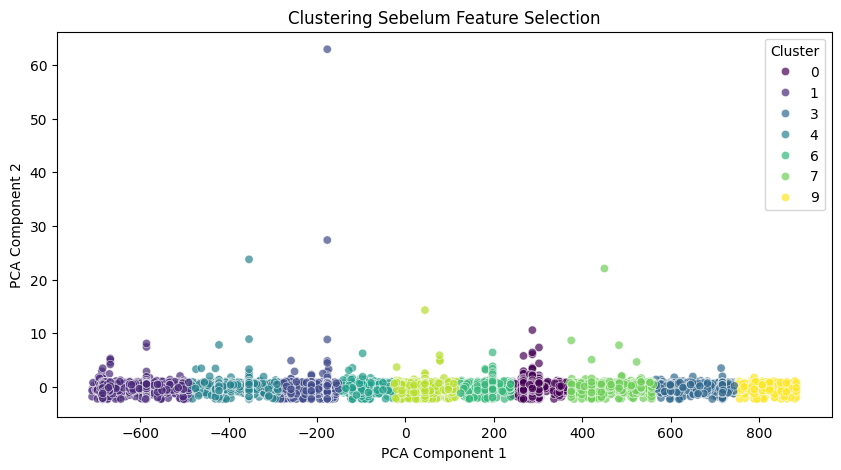

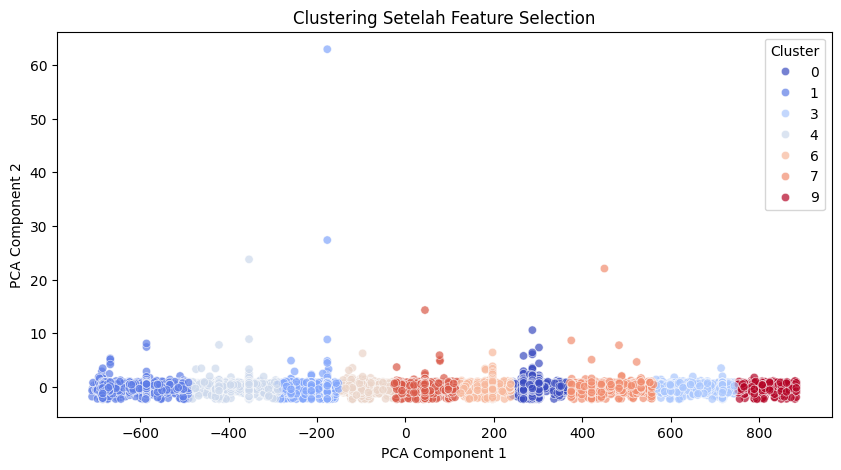

In [68]:
# Scatter plot sebelum feature selection
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(df_selected)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1], hue=cluster_labels, palette='viridis', alpha=0.7)
plt.title('Clustering Sebelum Feature Selection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Scatter plot setelah feature selection
pca_after = PCA(n_components=2)
X_pca_after = pca_after.fit_transform(X_selected)

plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_pca_after[:, 0], y=X_pca_after[:, 1], hue=cluster_labels_new, palette='coolwarm', alpha=0.7)
plt.title('Clustering Setelah Feature Selection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [69]:
# Tambahkan Hasil Label Cluster ke DataFrame
df_sampled['Cluster'] = cluster_labels

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [70]:
# Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi
df_original = df_sampled.copy()

# Pastikan untuk menggunakan label_encoder yang sama dengan yang digunakan untuk transformasi awal
for column in categorical_features:
    le = LabelEncoder()
    df_sampled[column] = le.fit_transform(df_sampled[column])
    df_original[column] = le.inverse_transform(df_sampled[column])

# Inverse transform untuk fitur numerikal yang telah distandarisasi
df_original[numerical_features] = scaler.inverse_transform(df_sampled[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [71]:
# Analisis Karakteristik Cluster dari Model KMeans
for cluster in range(3):
    print(f'Cluster {cluster}:')
    print(df_original[df_original['Cluster'] == cluster].describe())

Cluster 0:
       CustAccountBalance  TransactionTime  TransactionAmount (INR)  Cluster
count        2.413000e+03     2.416000e+03             2.416000e+03   2416.0
mean         1.358553e+11     7.954456e+09             1.459592e+07      0.0
std          5.385486e+11     2.590300e+09             9.201130e+07      0.0
min          1.198998e+05     1.883748e+06             1.684340e+03      0.0
25%          5.154609e+09     6.257752e+09             1.423991e+06      0.0
50%          1.867324e+10     8.305654e+09             3.634652e+06      0.0
75%          7.496155e+10     9.947581e+09             9.912421e+06      0.0
max          1.340639e+13     1.197427e+10             4.047133e+09      0.0
Cluster 1:
       CustAccountBalance  TransactionTime  TransactionAmount (INR)  Cluster
count        2.355000e+03     2.358000e+03             2.358000e+03   2358.0
mean         9.061985e+10     8.030420e+09             1.230253e+07      1.0
std          4.116901e+11     2.506020e+09            

# **Analisis Karakteristik Cluster dari Model KMeans**   

## **Cluster 0:**  
- **Rata-rata CustAccountBalance:** 135.86 miliar  
- **Rata-rata TransactionTime:** 7.95 miliar  
- **Rata-rata TransactionAmount (INR):** 14.59 juta  
- **Analisis:**  
  Cluster ini mencakup pelanggan dengan saldo rekening yang cukup besar dan waktu transaksi yang relatif tinggi. Rata-rata jumlah transaksi juga lebih tinggi dibandingkan cluster lainnya. Pelanggan dalam cluster ini kemungkinan memiliki stabilitas keuangan yang baik dan cukup aktif dalam bertransaksi.  

## **Cluster 1:**  
- **Rata-rata CustAccountBalance:** 90.62 miliar  
- **Rata-rata TransactionTime:** 8.03 miliar  
- **Rata-rata TransactionAmount (INR):** 12.30 juta  
- **Analisis:**  
  Pelanggan dalam cluster ini memiliki saldo rekening yang lebih rendah dibandingkan Cluster 0, tetapi masih dalam kisaran tinggi. Mereka juga memiliki aktivitas transaksi yang aktif dengan jumlah transaksi yang cukup besar. Kemungkinan besar, pelanggan ini termasuk dalam kategori pengguna menengah-atas yang memiliki pola transaksi stabil.  

## **Cluster 2:**  
- **Rata-rata CustAccountBalance:** 160.59 miliar  
- **Rata-rata TransactionTime:** 7.96 miliar  
- **Rata-rata TransactionAmount (INR):** 10.65 juta  
- **Analisis:**  
  Cluster ini terdiri dari pelanggan dengan saldo rekening tertinggi dibandingkan cluster lainnya, tetapi rata-rata jumlah transaksi yang lebih kecil. Hal ini bisa menunjukkan bahwa pelanggan dalam cluster ini memiliki kapasitas finansial yang besar tetapi lebih selektif dalam melakukan transaksi   atau cenderung melakukan transaksi dengan nominal lebih kecil tetapi lebih sering.  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [72]:
# Simpan hasilnya ke dalam file CSV
df_original.to_csv('clustered_data.csv', index=False)